In [1]:
import networkx as nx
import matplotlib.pyplot as plt
#create a empty graph without the edge and node
G = nx.Graph()
G

# nodes(vertex)

In [2]:
G.clear()
G.add_node(1)
G.add_node(4)
G.add_nodes_from([3,"sd"])

#add node and node's attribute
G.add_nodes_from([
    (5,{"color":'red'}),
    (6,{"color":'blue'})
])
G.nodes['sd']['color'] = 'green'
G.remove_node(4)
print(G.nodes['sd']['color'])
print(G.nodes)

#add nodes in another graph to the graph
H = nx.path_graph(10)
# print(H.nodes)
# print(H.edges)
G.add_nodes_from(H)
G.nodes

G.add_node("spam")
print("3 nodes: "+ str(G.nodes()))
G.add_nodes_from("spam")
print("4 nodes: "+ str(G.nodes()))

x = list(G.nodes)
x[1]

G.nodes['sd']

green
[1, 3, 'sd', 5, 6]
3 nodes: [1, 3, 'sd', 5, 6, 0, 2, 4, 7, 8, 9, 'spam']
4 nodes: [1, 3, 'sd', 5, 6, 0, 2, 4, 7, 8, 9, 'spam', 's', 'p', 'a', 'm']


{'color': 'green'}

# edge

In [3]:
G.clear()
print(G.nodes())
print(G.edges())
G.add_edge(1,2)
G.add_edge(1,10)
print("1 edges: "+ str(G.edges)+"   "+str(list(G.edges)[0][0]))

# unpack edge tuple*
e = (2,3)
G.add_edge(*e)
print("2 edges: "+ str(G.edges))

G.add_edges_from([(3,4)])
G.add_edges_from([(5,6),(5,7)])
# G.remove_edge(3,3)
print("3 nodes: "+ str(G.nodes()))
print("3 edges: "+ str(G.edges))

G.add_edges_from(H.edges)
print("4 edges: "+ str(G.edges))

#edge weight

G.add_edge(2,4,weight = 7.8)
print("5 edge (2,4)'s weight is "+ str(G.edges[2,4]['weight']))
print("5 edge (2,4)'s weight is "+ str(G[2][4]['weight']))

#edge attribute
es = [(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})]
N = nx.Graph(es)
N[1][2]

[]
[]
1 edges: [(1, 2), (1, 10)]   1
2 edges: [(1, 2), (1, 10), (2, 3)]
3 nodes: [1, 2, 10, 3, 4, 5, 6, 7]
3 edges: [(1, 2), (1, 10), (2, 3), (3, 4), (5, 6), (5, 7)]
4 edges: [(1, 2), (1, 10), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (5, 7), (6, 7), (7, 8), (8, 9)]
5 edge (2,4)'s weight is 7.8
5 edge (2,4)'s weight is 7.8


{'color': 'blue'}

# number of edges and nodes

In [4]:
nodes = G.number_of_nodes()
print(nodes)
edges = G.number_of_edges()
edges

11


12

# check the element of graph

In [171]:
G.clear()
v = [1, 2, 3, 'spam', 's', 'p', 'a', 'm']
G.add_nodes_from(v)
e = [(1, 2), (1, 3), (3, 'm')]
G.add_edges_from(e)

#list the nodes and edges
print(list(G.nodes))
print(list(G.edges))
G.edges[1,3]['weigth'] = 11.2

# check the neighbour 
print(list(G.adj[1]))
print(list(G.neighbors(3)))
G.degree(1)
G.degree(2)

print()
print(G.edges([3]))
print(G[3])

print()
print(G.edges([2,'m']))
print(G.degree([2,'m',3]))




[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
[(1, 2), (1, 3), (3, 'm')]
[2, 3]
[1, 'm']

[(3, 1), (3, 'm')]
{1: {'weigth': 11.2}, 'm': {}}

[(2, 1), ('m', 3)]
[(2, 1), ('m', 1), (3, 2)]


# 使用图形构造函数

In [185]:
G.clear()
G.add_edge(1,2)
G.add_edge(3,4)
H = nx.DiGraph(G)
print(H.edges)

edgelist = [(0, 1), (1, 2), (2, 3)]
M = nx.Graph(edgelist)
print(M.nodes)
M.edges()

[(1, 2), (2, 1), (3, 4), (4, 3)]
[0, 1, 2, 3]


EdgeView([(0, 1), (1, 2), (2, 3)])

# test

[('a', 'b'), ('a', 'c'), ('b', 'd'), ('c', 'd'), ('c', 'f'), ('d', 'f')]
[('a', 'b'), ('a', 'c'), ('b', 'd'), ('c', 'f'), ('c', 'd'), ('d', 'f')]


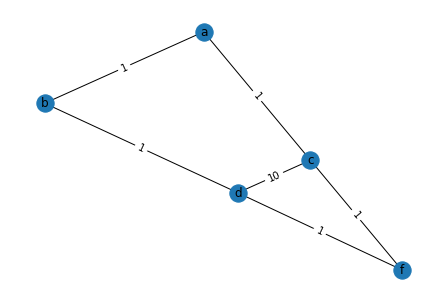

In [16]:
edges = (('a','b',{'weight':1}),('a','c',{'weight':1}),('d','b',{'weight':1}),
         ('c','d',{'weight':10}),('c','f',{'weight':1}),('f','d',{'weight':1}))
G = nx.Graph(edges)
weight = 'weight'
G_prime = nx.spanner(G,3.0,weight)
print(G.edges)
print(G_prime.edges)


pos = nx.spring_layout(G)

# pos = {'a': [0,  0],
#  'b': [0, 2],
#  'c': [2, 2],
#  'd': [ 2, 0],
#  'f': [1, 1]}
nx.draw(G_prime,pos,with_labels=True)
edge_labels = nx.get_edge_attributes(G_prime,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
plt.show()

# Greedy algorithm

In [10]:
import networkx as nx
import matplotlib.pyplot as plt


def greedy(G,t,weight=None):
    edges = list(G.edges)
    weighted_edges = sorted(G.edges(data=True), key=lambda t: t[2].get(weight, 1))
    nodes = list(G.nodes)
    
    G_prime = nx.Graph()
    G_prime.add_nodes_from(nodes)
    print(G_prime)
    for edge in weighted_edges:
#         print("========")
#         print(edge)
#         print(edge[0]+edge[1]+ weight)
        try:
            shortest_dist = nx.dijkstra_path_length(G_prime,edge[0],edge[1],weight)
        except Exception:
            shortest_dist = float('inf')
#         print(shortest_dist)
#         print(t * (G[edge[0]][edge[1]][weight]) )
        
        if(shortest_dist > t * (G[edge[0]][edge[1]][weight]) ):
#             print("added")
            add_edge = [(edge[0],edge[1],{weight :(G[edge[0]][edge[1]][weight]) })]
            G_prime.add_edges_from(add_edge)
#         print(G_prime.edges)
#         print("========")
#     print(G_prime.edges)
    return G_prime

        
    
        
    


In [8]:
edges = (('a','b',{'weight':1}),('a','c',{'weight':1}),('d','b',{'weight':1}),
         ('c','d',{'weight':10}),('c','f',{'weight':4}),('f','d',{'weight':1}))
# edges = (('a','b'),('a','c'),('d','b'),
#          ('c','d'),('c','f'),('f','d'))
G.clear()
edges = (('a','b',{'weight':100}),('a','c',{'weight':100}),('d','b',{'weight':100}),
         ('c','d',{'weight':1000}),('c','f',{'weight':100}),('f','d',{'weight':100}))
G = nx.Graph(edges)

# dis = nx.dijkstra_path_length(G,'a','h',weight="weight")
G_prime = greedy(G,3,"weight")
print(G_prime)
print(G_prime.edges(data = True))
# paths = nx.all_shortest_paths(G,'f','c','weight')


Graph with 5 nodes and 0 edges
Graph with 5 nodes and 5 edges
[('a', 'b', {'weight': 100}), ('a', 'c', {'weight': 100}), ('b', 'd', {'weight': 100}), ('c', 'f', {'weight': 100}), ('d', 'f', {'weight': 100})]


In [9]:
a = float("inf")
b =3
a>b

True

# Probabilistic algorithm

In [11]:
import networkx as nx
import numpy as np
import math
def pro(G,k,c,weight=None):
    N = G.number_of_nodes()
    lam = math.log(c*N)/k
    print(lam)
    for node in G.nodes:
        ru = np.random.exponential(lam)
        print(ru)
        
    

In [31]:
math.log(10)

2.302585092994046

In [12]:
edges = (('a','b',{'weight':1}),('a','c',{'weight':1}),('d','b',{'weight':1}),
         ('c','d',{'weight':10}),('c','f',{'weight':1}),('f','d',{'weight':1}))
# edges = (('a','b'),('a','c'),('d','b'),
#          ('c','d'),('c','f'),('f','d'))

G = nx.Graph(edges)
pro(G,3,1000,weight='weight')

2.839064397138746
3.4765102600123936
3.2962609552915283
2.2796652607129406
1.4412948187118744
0.1792047533743793
